# Advanced Spapros Tutorial: Probeset and Reference Selection followed by Comparative Evaluation

This tutorial shows how to select a gene probeset with spapros. Additionally, reference probesets are selected. Finally, all gene sets are evaluated and compared.

The used dataset contains 3k PBMCs from a healthy donor and is publicly available from
[10x Genomics](https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k)
[here](http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz).
It is also available via scanpy [here](https://scanpy.readthedocs.io/en/stable/generated/scanpy.datasets.pbmc3k.html#scanpy.datasets.pbmc3k).

The dataset was preprocessed following the [scanpy pipeline](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

The preprocessed Anndata consists of raw single cell RNAseq counts of 2000 genes for 2700 cells.

## Import packages and data

To run the notebook locally, create a conda environment using this [environment.yaml](TODO link):

    conda create -f environment.yaml

Then add the conda environment as ipython kernel:

    python -m ipykernel install --user --name spapros --display-name Python (spapros)



In [1]:
import spapros
from spapros import ProbesetSelector, ProbesetEvaluator, pl
from IPython.display import clear_output
import scanpy as sc
import pandas as pd
import os
import yaml
import matplotlib as mpl

/big/st/strasserl/spapros/spapros/selection/selection_procedure.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
sc.settings.verbosity = 1
sc.logging.print_header()
print(f"spapros=={spapros.__version__}")

scanpy==1.8.1 anndata==0.7.8 umap==0.5.2 numpy==1.21.4 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
spapros==0.1.0


In [3]:
# Load the dataset
adata = sc.read_h5ad("../data/small_data_raw_counts.h5ad")
adata.layers["raw"] = adata.X.copy()
sc.pp.log1p(adata)
adata


AnnData object with n_obs × n_vars = 2700 × 2000
    obs: 'n_genes', 'size_factors', 'leiden', 'celltype', 'tissue'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'quantile_0.85', 'quantile_0.9', 'quantile_0.95', 'quantile_0.99'
    uns: 'log1p'
    layers: 'raw'

## Set up the ProbesetSelector

Next to the spapros selection pipeline, we run several basic selection methods to create reference probe sets:
- `pca_selection`: PCA based selection
- `hvg_selection`: Selection of highly variable genes
- `de_selection`: Differentially expressed genes selection
- `random_selection`: Random gene selection

Thus, we will have 5 probsets in the end.
The reference selection methods are specified as dictionary with the selection name as key along with another dictonary as key specifying hyper parameters. If the default parameters should be used, empty dictionaries are sufficient.

In [5]:
# create an instance of the ProbesetSelector class
selector = ProbesetSelector(adata, 
                            n=50, 
                            celltype_key = "celltype", 
                            reference_selections={"hvg_selection": {"flavor": "seurat"}, 
                                                  "random_selection": {"seed": "48"}, 
                                                  "pca_selection": {}, 
                                                  "DE_selection": {"per_group": "True"}})

The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 celltype_4 : 5
	 celltype_5 : 9
	 celltype_8 : 1


The final parameters are stored in class variables, e.g.: 

In [6]:
selector.pca_selection_hparams

{'variance_scaled': False,
 'absolute': True,
 'n_pcs': 20,
 'penalty_keys': [],
 'corr_penalty': None}

In [ ]:
# TODO
# parameter discussion 
# interesting pararms could be: 
# preselected_genes: will be first in the output

"""
general: 
    prior_genes: 
    preselected_genes: 
        Pre selected genes (these will also have the highest ranking in the final list).

marker: 
    marker_corr_th
    n_list_markers
        n_list_markers: 
        Minimal number of markers per celltype that are at least selected. Selected means either selecting genes
        from the marker list or having correlated genes in the already selected panel. (Set the correlation
        threshold with marker_selection_hparams['penalty_threshold']).
        If you want to select a different number of markers for celltypes in adata and celltypes only in the marker
        list, set e.g.: n_list_markers = {'adata_celltypes':2,'list_celltypes':3}

penalties:
    m_penalties_adata_celltypes
    m_penalties_list_celltypes
    min_mean_difference:
        Minimal difference of mean expression between at least one celltype and the background. In this test only
        cell types from `celltypes` are taken into account (also for the background). This minimal difference is
        applied as an additional binary penalty in pca_penalties, DE_penalties and m_penalties_adata_celltypes.
    pca_penalties
    DE_penalties
    marker penalties

"""




## Start the selection

In [18]:
# TODO
# rough description of the spapros selection pipeline

In [19]:
# invoke the central selection method
selector.select_probeset()


Select pca genes...
	 ...finished.
Select genes based on differential expression and forests as baseline for the final forests...
	 Select differentially expressed genes...
		 ...finished.
	 Train trees on DE selected genes as prior forest for the DE_baseline forest...


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

/big/st/strasserl/spapros/spapros/evaluation/evaluation.py:1034: UserWarning: Zero cells of celltype celltype_8 in train or test set. No tree is calculated for celltype celltype_8.
  warnings.warn(f"Zero cells of celltype {c} in train or test set. No tree is calculated for celltype {c}.")
/big/st/strasserl/spapros/spapros/evaluation/evaluation.py:1036: UserWarning: Zero cells of celltype celltype_8 in train or test set. Celltype celltype_8 is not included as reference celltype.
  warnings.warn(


Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

	 Train DE_baseline forest by iteratively selecting specific differentially expressed genes for celltypes that are hard to distinguish...
Add DE genes with specific reference groups to improve tree performance...
  Iteration step 1:
	 Select DE genes...
	 Train decision trees on celltypes:
		 ['celltype_1', 'celltype_2', 'celltype_3', 'celltype_6']


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

		 Training finished.
  Iteration step 2:
	 Select DE genes...
	 Train decision trees on celltypes:
		 ['celltype_1', 'celltype_3', 'celltype_6']


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

		 Training finished.
  Iteration step 3:
	 Select DE genes...
	 Train decision trees on celltypes:
		 ['celltype_1', 'celltype_3', 'celltype_6']


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

		 Training finished.
Train final trees on all celltypes, now with the added genes...


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

	 Finished...
Train final forests by adding genes from the DE_baseline forest for celltypes with low performance...
	 Train forest on pre/prior/pca selected genes...


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

	 Iteratively add genes from DE_baseline_forest...
Adding genes from reference tree...
Train final trees on all celltypes, now with the added genes...


Train hierarchical trees:   0%|          | 0/3 [00:00<?, ?it/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

Train trees:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate trees:   0%|          | 0/50 [00:00<?, ?/s]

	 Finished...
Select ref_hvg_selection genes...
	 ...finished.
Select ref_random_selection genes...
	 ...finished.
Select ref_pca_selection genes...
	 ...finished.
Select ref_DE_selection genes...
	 ...finished.


The selected probesets can be examined like this: 

In [20]:
selected_probesets = selector.probeset[["selection", "ref_random_selection", "ref_hvg_selection", "ref_DE_selection", "ref_pca_selection"]]
selected_probesets

,selection,ref_random_selection,ref_hvg_selection,ref_DE_selection,ref_pca_selection
PF4,True,False,False,True,False
CD79A,True,False,False,True,True
NKG7,True,False,False,True,True
LST1,True,False,False,True,True
LTB,True,False,False,True,True
...,...,...,...,...,...
RP11-285J16.1,False,False,False,False,False
RP5-1112D6.8,False,False,False,False,False
AC123023.1,False,False,False,False,False
YEATS2-AS1,False,False,False,False,False


## Vizualize the results

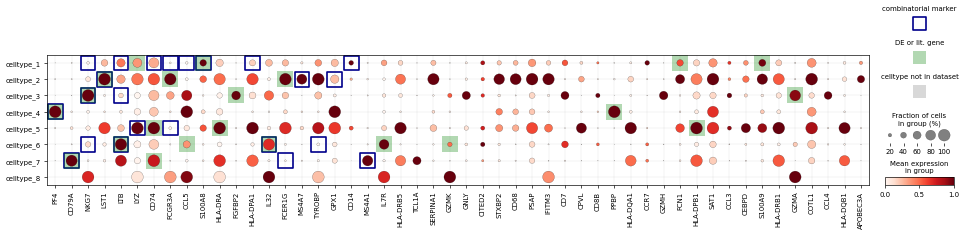

In [21]:
pl.masked_dotplot(adata, selector)

## Evaluate the selection: Set up the ProbesetEvaluator

The quality of a selected probeset is not easy to describe. A useful probeset represents both the biological importance and the variability inherent in the total gene set. Spapros provides a set of evaluation metrics that measure the performance in these categories.

By default, `metric_scheme="quick"`, which means that only the faster metrics are calculated, which are:

>- knn
>- forest classification
>- marker correlation (if marker list given, eg. `marker_list="../data/small_data_marker_list.csv"`)
>- gene correlation

Through setting scheme="full", additionally the following metric is calculated:
>- nmi


Alternatively, you can specify `scheme="custom"` and `metrics=custom_list` where `custom_list` is a list of the metrics of interest.

Below, the metrics will be further explained. 

For each evaluation metric, several parameters can be customized. Therefor, the ProbesetEvaluator takes an dictionary containing the parameters as values as `metric_params` argument. 
Here, we stored a set of paramets in a yaml file: 

In [22]:
# loading metric parameters from file
param_yaml = "../data/parameters.yml"
with open(param_yaml, "r") as file:
    custom_params = yaml.load(file, Loader=yaml.FullLoader)
custom_params

{'data': {'name': 'small_data',
  'process_adata': ['norm', 'log1p'],
  'celltype_key': 'celltype'},
 'metrics': {'cluster_similarity': {'ns': [5, 21],
   'AUC_borders': [[7, 14], [15, 20]]},
  'knn_overlap': {'ks': [5, 10, 15, 20, 25, 30]},
  'forest_clfs': {'ct_key': 'celltype', 'threshold': 0.8},
  'marker_corr': {'per_celltype': True,
   'per_marker': True,
   'per_celltype_min_mean': None,
   'per_marker_min_mean': 0.025},
  'gene_corr': {'threshold': 0.8}}}

In [23]:
# initialize an ProbesetEvaluator
evaluator = ProbesetEvaluator(adata, metrics_params=custom_params, scheme="full", marker_list="../data/small_data_marker_list.csv")

The principal method for evaluation is `ProbesetEvaluator.evaluate_probeset()`, which needs to be invoked once for each probe set. The `set_id` has to be specified in each iteration. Otherwise, the results will be overwritten. 

## Run evaluation methods

In [24]:
for probeset in selected_probesets: 
    gene_list = selected_probesets.index[selected_probesets[probeset]].to_list()
    evaluator.evaluate_probeset(gene_list, set_id=probeset)
    clear_output(wait=True)

The following cell types are not included in forest classifications since they have fewer 
than 40 cells: ['celltype_5', 'celltype_4', 'celltype_8']

/big/st/strasserl/spapros/spapros/evaluation/metrics.py:1039: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summaries = cor_df[[col for col in cor_df.columns if (col != "mean")]].mean(axis=0)


In [25]:
mpl.rcParams['figure.dpi'] = 60

## Visualize the evaluation results

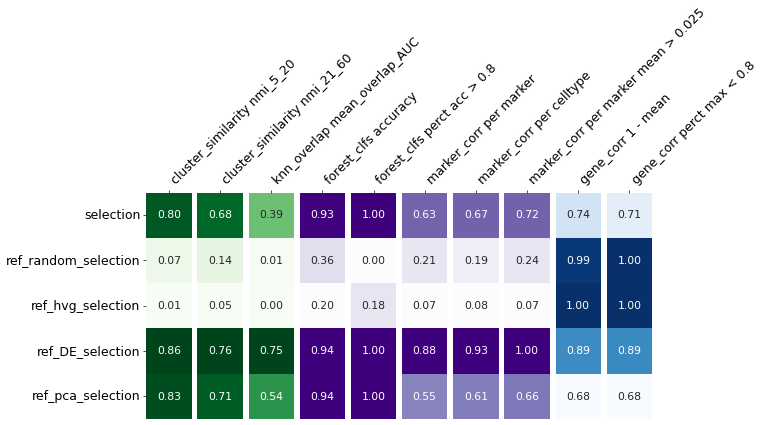

In [26]:
evaluator.plot_summary()

I this plot, each row summarizes the evaluation metrics of one probeset.
The metrics evaluating the variability recovery are shown in the green columns (1-3). 
In the first column, you can see the NMI of coarse clusterings of the selected probe set and the full gene set. 
Here, for both gene sets clusters with between 5 and 20 clusters were created.
The second column shows the NMI of clusterings from 21 to 60 clusters and thus represents the performance of finer variability recovery.
As the clusterings should picture the heterogeinity of the expression data, a variability recovering subset would would cluster similarly.
Both NMI values are highest for the pca based selection, which indicates that this method recovers the variability best.

The third column reveals the graph overlap of the knn graphs of the full gene set and the respective probeset. If this value is high, it means that fine variations within the full gene set are captured by the probeset.

The subsequent purple columns (4-8) indicate the performance of each selection method with respect to cell type identification. 
Column 4 contains the mean classification accuracy of a random forest prediction over cell types. This quantifies the overall classification success while column 5 provides an estimate for the percentage of reliably captured cell types, i.e. the average of a smoothed thresholding of classification performance around 0.8 for each cell type.
The other 3 purple columns (6-8) derive from the comparison of the correlation within the selected probeset with the correlation within the marker list.  

The last two, blue columns (9, 10) evaluate the correlation within a selected probeset. If genes with highly correlated expression are selected, the information content could also be provided by just one of them.


### Random forest classification

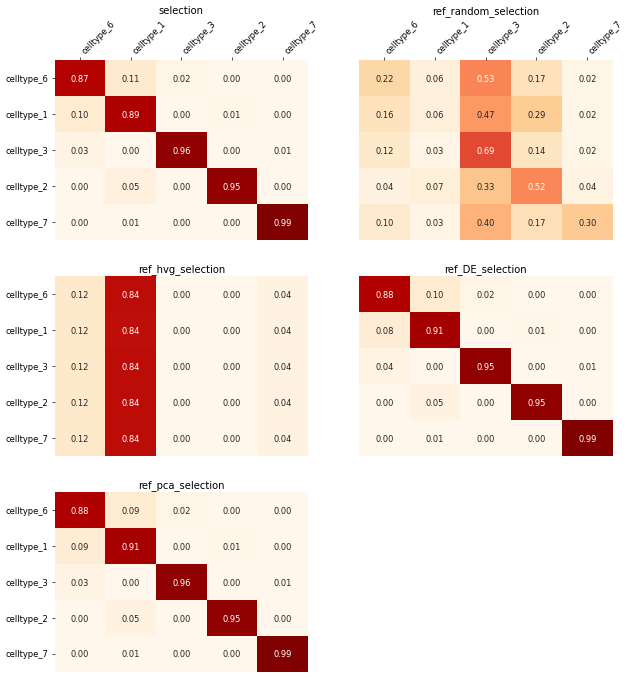

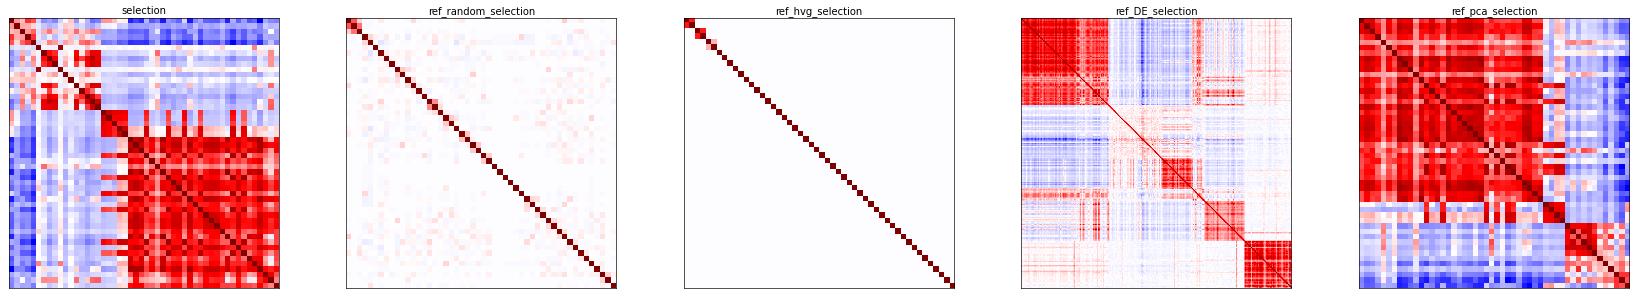

In [27]:
evaluator.plot_evaluations(metrics = ["forest_clfs"])

### Gene correlation

In [ ]:
evaluator.plot_evaluations(metrics = ["gene_corr"])

### KNN 

### NMI cluster similarity

### Marcer correlation